## NIfTI File Analysis 

In [1]:
# Import necessary libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# For inline plotting in Jupyter notebook
%matplotlib inline

In [2]:
# Add a helpful introduction
print("=" * 80)
print("INTRODUCTION TO NIFTI FILES".center(80))
print("=" * 80)
print("""
NIfTI (Neuroimaging Informatics Technology Initiative) files are a common format
for storing medical imaging data. They typically have .nii or .nii.gz extensions,
with the latter being compressed.

These files contain:
1. 3D or 4D volume data (voxels)
2. Affine transformation matrix (mapping voxel indices to physical space)
3. Header information with metadata

Let's explore our example files and learn how to work with them.
""")

                          INTRODUCTION TO NIFTI FILES                           

NIfTI (Neuroimaging Informatics Technology Initiative) files are a common format
for storing medical imaging data. They typically have .nii or .nii.gz extensions,
with the latter being compressed.

These files contain:
1. 3D or 4D volume data (voxels)
2. Affine transformation matrix (mapping voxel indices to physical space)
3. Header information with metadata

Let's explore our example files and learn how to work with them.



## Loading and Examining Basic File Information

In [3]:
def analyze_nifti_file(file_path):
    """
    Load and analyze basic properties of a NIfTI file
    
    Parameters:
        file_path (str): Path to the NIfTI file
        
    Returns:
        tuple: (nib.Nifti1Image, numpy.ndarray) - The NIfTI image object and its data
    """
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return None, None
        
    # Load the NIfTI file
    print(f"\nLoading file: {os.path.basename(file_path)}")
    img = nib.load(file_path)
    
    # Get the image data as a NumPy array
    data = img.get_fdata()
    
    # Print basic information
    print(f"➤ Data shape: {data.shape}")
    print(f"➤ Data type: {data.dtype}")
    print(f"➤ Value range: [{data.min():.3f}, {data.max():.3f}]")
    
    # Print dimensionality information
    if len(data.shape) == 3:
        print(f"➤ This is a 3D volume with dimensions: {data.shape[0]}×{data.shape[1]}×{data.shape[2]} voxels")
    elif len(data.shape) == 4:
        print(f"➤ This is a 4D dataset with dimensions: {data.shape[0]}×{data.shape[1]}×{data.shape[2]} voxels × {data.shape[3]} volumes")
        
    # Print affine transformation (mapping from voxel indices to mm)
    print("\nAffine Transformation Matrix:")
    print(f"➤ This matrix maps voxel indices to real-world coordinates (in mm):")
    print(img.affine)
    
    # Print voxel dimensions (spatial resolution)
    header = img.header
    voxel_sizes = header.get_zooms()
    print(f"\nVoxel dimensions: {voxel_sizes[:3]} mm")
    
    return img, data

# Analyze both files
print("\n" + "=" * 80)
print("FILE 1: IVIM CHEST".center(80))
print("=" * 80)
ivim_img, ivim_data = analyze_nifti_file('/Users/ayush/Desktop/project-internsip/Datasets/ivim_chest.nii.gz')

print("\n" + "=" * 80)
print("FILE 2: TUMOR".center(80))
print("=" * 80)
tumor_img, tumor_data = analyze_nifti_file('/Users/ayush/Desktop/project-internsip/Datasets/tumor.nii.gz')


                               FILE 1: IVIM CHEST                               

Loading file: ivim_chest.nii.gz
➤ Data shape: (224, 224, 67, 9)
➤ Data type: float64
➤ Value range: [0.000, 3827.761]
➤ This is a 4D dataset with dimensions: 224×224×67 voxels × 9 volumes

Affine Transformation Matrix:
➤ This matrix maps voxel indices to real-world coordinates (in mm):
[[-2.00886607e+00 -3.21494765e-03  4.62979451e-02  2.23166367e+02]
 [-3.25112999e-03  2.00892043e+00 -1.39706433e-02 -2.18109299e+02]
 [ 1.54939648e-02  4.70260251e-03  5.99981689e+00 -1.91489120e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Voxel dimensions: (np.float32(2.0089285), np.float32(2.0089285), np.float32(6.000012)) mm

                                 FILE 2: TUMOR                                  

Loading file: tumor.nii.gz
➤ Data shape: (192, 192, 64)
➤ Data type: float64
➤ Value range: [0.000, 1.000]
➤ This is a 3D volume with dimensions: 192×192×64 voxels

Affine Transformation 

## Display a Single Slice

Slice info: min=0.000, max=3453.333


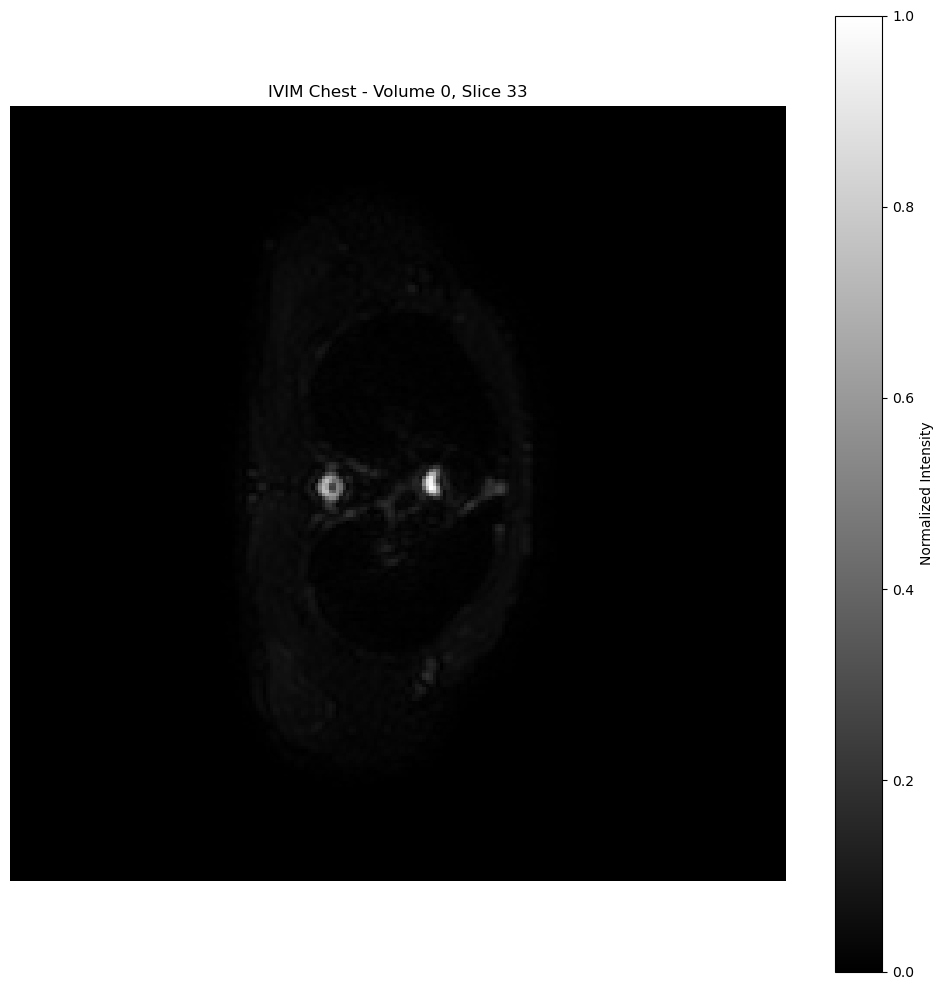

In [13]:
def display_ivim_slice(data, slice_index=None, volume_index=0):
    """
    Display a single slice from the IVIM chest dataset.
    
    Parameters:
        data (numpy.ndarray): The 4D IVIM data array
        slice_index (int): Index of the slice to display (default: middle slice)
        volume_index (int): Index of the volume/b-value to display (default: 0)
    """
    # Check if the volume index is valid
    if volume_index >= data.shape[3]:
        print(f"Error: Volume index {volume_index} out of range (max: {data.shape[3]-1})")
        return
    
    # Extract the 3D volume for the specified b-value
    volume_data = data[:, :, :, volume_index]
    
    # Find the middle slice if not specified
    if slice_index is None:
        slice_index = volume_data.shape[2] // 2
    
    # Get the slice data
    slice_data = volume_data[:, :, slice_index]
    
    # Create a simple figure
    plt.figure(figsize=(10, 10))
    
    # Normalize for better visualization
    if slice_data.max() > slice_data.min():
        norm_data = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())
    else:
        norm_data = slice_data
    
    # Display the slice
    plt.imshow(norm_data, cmap='gray')
    plt.title(f'IVIM Chest - Volume {volume_index}, Slice {slice_index}')
    plt.colorbar(label='Normalized Intensity')
    plt.axis('off')
    
    # Print slice info
    print(f"Slice info: min={slice_data.min():.3f}, max={slice_data.max():.3f}")
    
    plt.tight_layout()
    plt.show()

# Display a central slice from the first volume of IVIM data
display_ivim_slice(ivim_data)

# Optionally display slices from other volumes
# Uncomment to see different b-values:
# display_ivim_slice(ivim_data, volume_index=1)
# display_ivim_slice(ivim_data, volume_index=2)

Found best slice: 15
Slice info: min=0.000000, max=1.000000
Non-zero pixels: 358/36864 (0.97%)


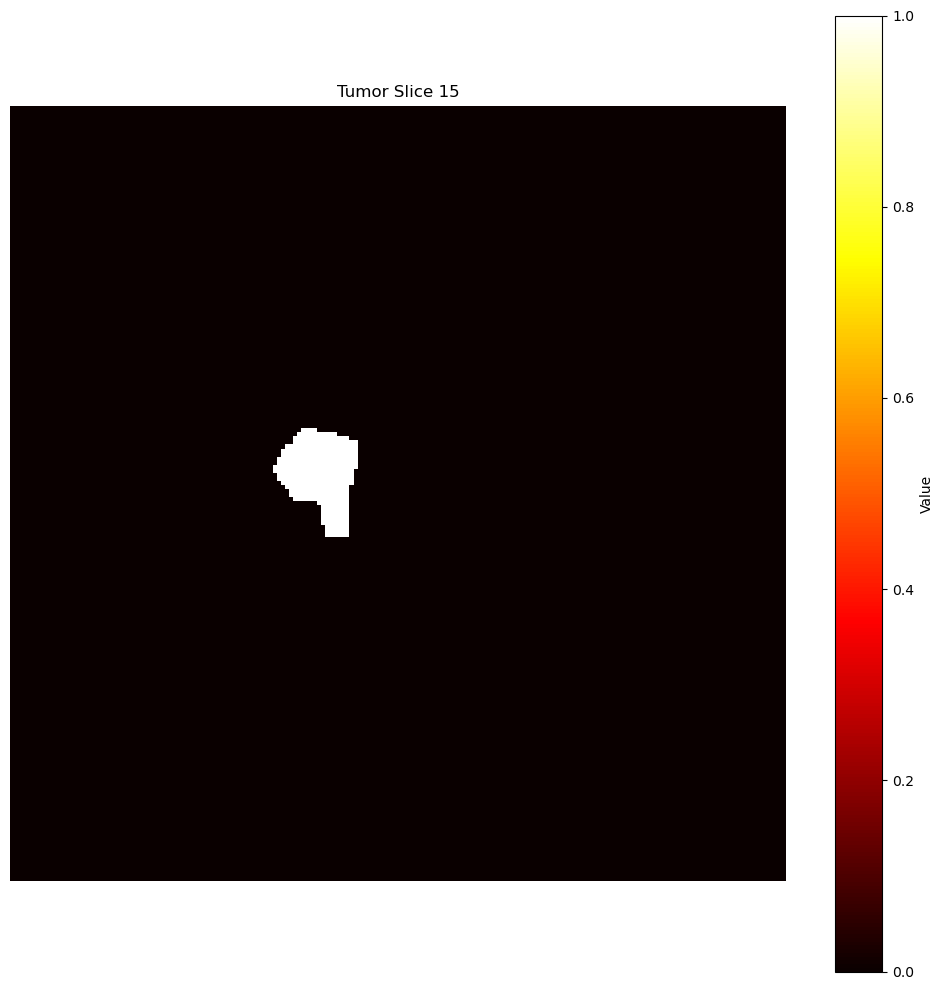

In [12]:
def display_tumor_slice(data, slice_index=None):
    """
    Very simple function to display a single tumor slice.
    """
    # Find the best slice if not provided
    if slice_index is None:
        # Find slice with most non-zero pixels (likely contains tumor)
        non_zero_counts = []
        for i in range(data.shape[2]):
            slice_data = data[:, :, i]
            non_zero_counts.append(np.count_nonzero(slice_data))
        
        slice_index = np.argmax(non_zero_counts)
        print(f"Found best slice: {slice_index}")
    
    # Get the slice data
    slice_data = data[:, :, slice_index]
    
    # Create a simple figure
    plt.figure(figsize=(10, 10))
    
    # First try normal visualization
    plt.imshow(slice_data, cmap='hot')
    plt.title(f'Tumor Slice {slice_index}')
    plt.colorbar(label='Value')
    plt.axis('off')
    
    print(f"Slice info: min={slice_data.min():.6f}, max={slice_data.max():.6f}")
    print(f"Non-zero pixels: {np.count_nonzero(slice_data)}/{slice_data.size} " +
          f"({np.count_nonzero(slice_data)/slice_data.size*100:.2f}%)")
    
    plt.tight_layout()
    plt.show()

# Now display a single tumor slice
display_tumor_slice(tumor_data)

## Compare Different Orientations (Axial, Sagittal, Coronal)


                         DIFFERENT VIEWING ORIENTATIONS                         

Medical images can be viewed in three standard orientations:
- Axial (transverse): Top-down view, slicing along Z-axis
- Sagittal: Side view, slicing along X-axis
- Coronal: Front-back view, slicing along Y-axis

Let's view the IVIM chest dataset in all three orientations:


Displaying Sagittal view (axis=0):


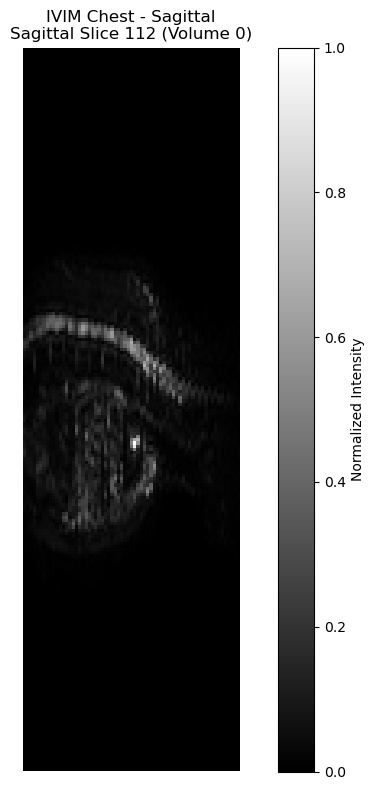


Displaying Coronal view (axis=1):


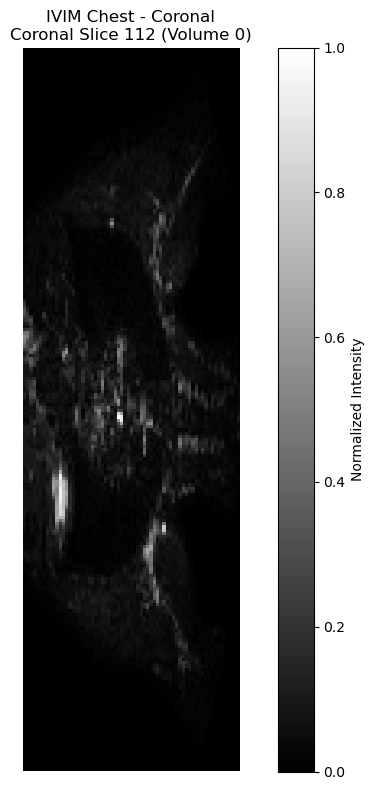


Displaying Axial view (axis=2):


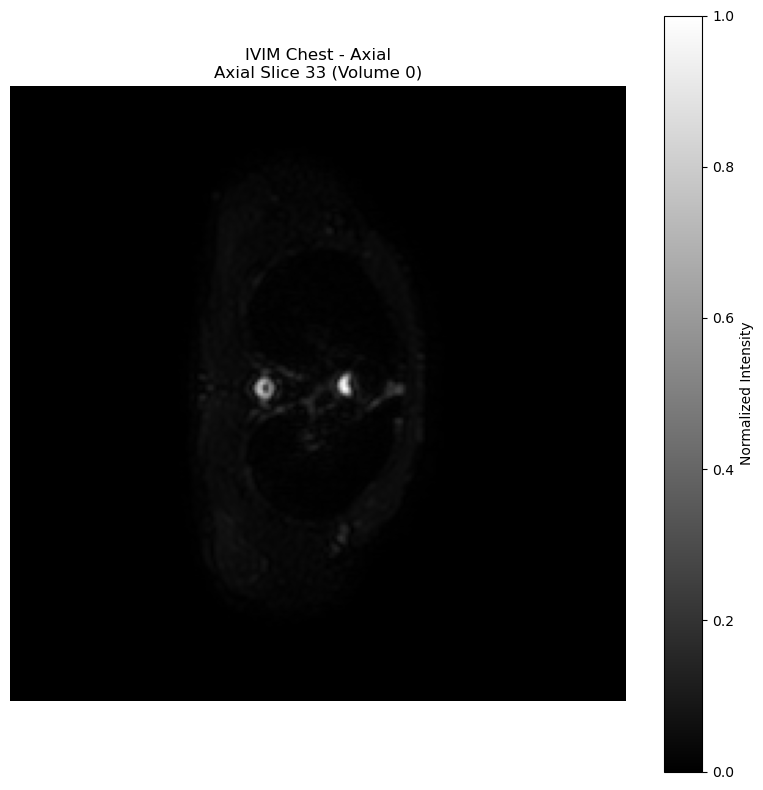

In [16]:
def display_nifti_slice(data, slice_index=None, axis=2, volume_index=0, title=None):
    """
    Display a single slice from a 3D or 4D NIfTI data array with support for different orientations
    
    Parameters:
        data (numpy.ndarray): The NIfTI data array
        slice_index (int): Index of the slice to display (default: middle slice)
        axis (int): Axis along which to take the slice (0=sagittal, 1=coronal, 2=axial)
        volume_index (int): For 4D data, which volume to use (default: 0)
        title (str): Optional title for the plot
    """
    # Handle 4D data
    if len(data.shape) > 3:
        if volume_index >= data.shape[3]:
            print(f"Error: Volume index {volume_index} out of range (max: {data.shape[3]-1})")
            return
        data_3d = data[..., volume_index]
        volume_info = f" (Volume {volume_index})"
    else:
        data_3d = data
        volume_info = ""
    
    # Select the middle slice if not specified
    if slice_index is None:
        slice_index = data_3d.shape[axis] // 2
    
    # Get the orientation name and extract the slice
    orientations = ['Sagittal', 'Coronal', 'Axial']
    orientation = orientations[axis]
    
    if axis == 0:
        slice_data = data_3d[slice_index, :, :]
    elif axis == 1:
        slice_data = data_3d[:, slice_index, :]
    else:  # axis == 2 (default)
        slice_data = data_3d[:, :, slice_index]
    
    # Normalize for better visualization
    if slice_data.max() > slice_data.min():
        norm_data = (slice_data - slice_data.min()) / (slice_data.max() - slice_data.min())
    else:
        norm_data = slice_data
    
    # Create figure
    plt.figure(figsize=(8, 8))
    
    # Display the slice
    plt.imshow(norm_data, cmap='gray')
    
    # Set title
    if title:
        plt.title(f"{title}\n{orientation} Slice {slice_index}{volume_info}")
    else:
        plt.title(f"{orientation} Slice {slice_index}{volume_info}")
    
    # Add colorbar and remove axis ticks
    plt.colorbar(label='Normalized Intensity')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print("DIFFERENT VIEWING ORIENTATIONS".center(80))
print("=" * 80)

print("""
Medical images can be viewed in three standard orientations:
- Axial (transverse): Top-down view, slicing along Z-axis
- Sagittal: Side view, slicing along X-axis
- Coronal: Front-back view, slicing along Y-axis

Let's view the IVIM chest dataset in all three orientations:
""")

# Display the three standard orientations for the IVIM dataset
for axis, name in enumerate(['Sagittal', 'Coronal', 'Axial']):
    print(f"\nDisplaying {name} view (axis={axis}):")
    display_nifti_slice(ivim_data, axis=axis, title=f"IVIM Chest - {name}")

##  Multiple Volumes in 4D Data (for IVIM dataset)



                          MULTIPLE VOLUMES IN 4D DATA                           

    The IVIM dataset has 9 different volumes (the 4th dimension).
    For diffusion imaging like IVIM, these typically represent different b-values
    (diffusion weightings) that capture water movement at different scales.
    
    Let's display the same slice from the first 3 volumes:
    


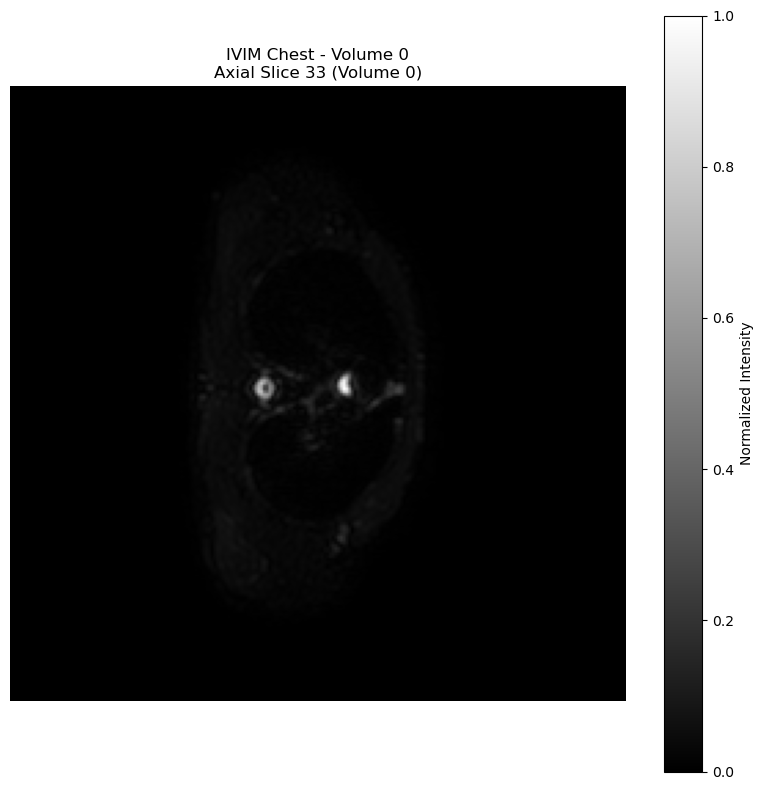

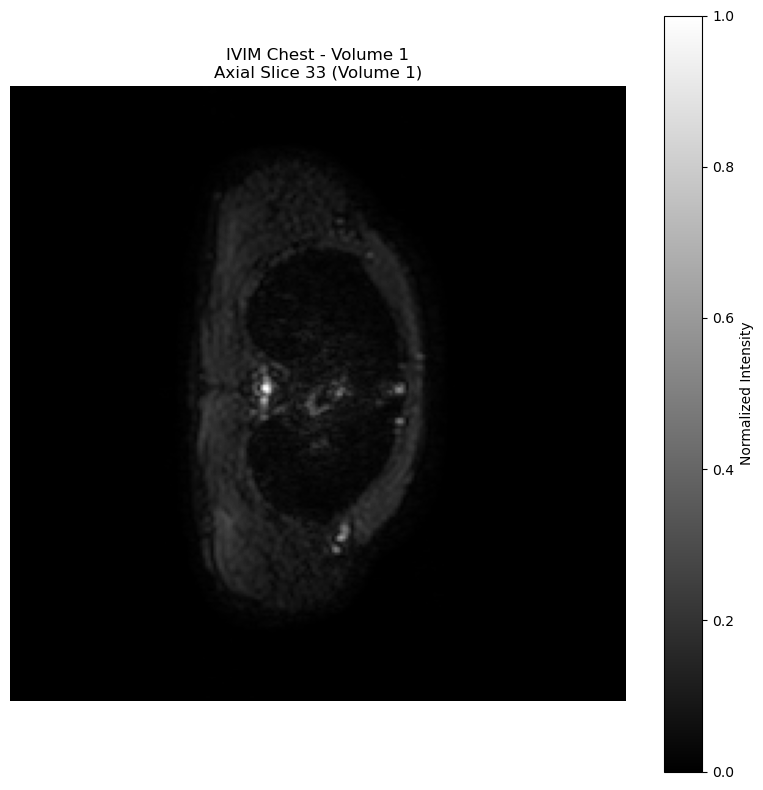

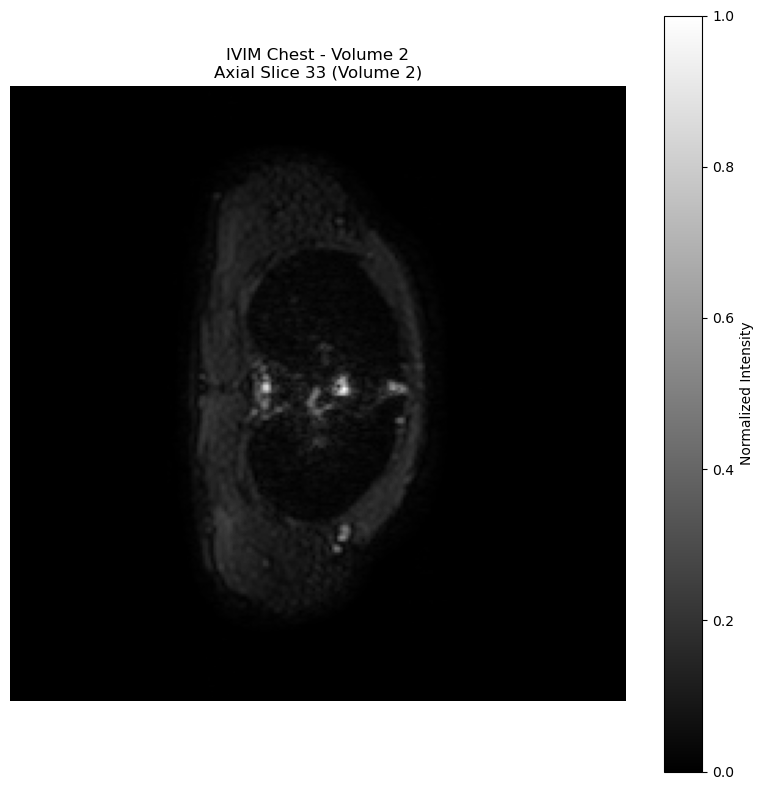

In [6]:
# Check if IVIM data is 4D and show multiple volumes if it is
if len(ivim_data.shape) > 3:
    print("\n" + "=" * 80)
    print("MULTIPLE VOLUMES IN 4D DATA".center(80))
    print("=" * 80)
    
    print(f"""
    The IVIM dataset has {ivim_data.shape[3]} different volumes (the 4th dimension).
    For diffusion imaging like IVIM, these typically represent different b-values
    (diffusion weightings) that capture water movement at different scales.
    
    Let's display the same slice from the first 3 volumes:
    """)
    
    for vol in range(min(3, ivim_data.shape[3])):
        display_nifti_slice(ivim_data, volume_index=vol, 
                           title=f"IVIM Chest - Volume {vol}")